In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
df=pd.read_csv("D:\\Msc Case study & Projects\\Loan prediction project\\loandata.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Train Categorical Variables Missisng values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df ['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


# Train Numerical Variables Missing Values
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df_copy=df.copy()

In [9]:
df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [11]:
gender=pd.crosstab(df['Gender'],df_copy['Loan_Status']) 
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [12]:
area=pd.crosstab(df['Property_Area'],df_copy['Loan_Status']) 
area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [13]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [15]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
# normalise can be set to true to print proportion instead of number
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

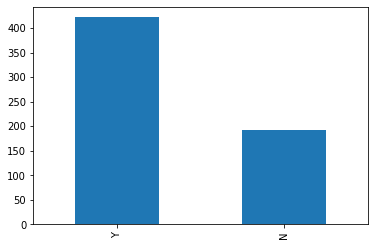

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
df['Loan_Status'].value_counts().plot.bar()

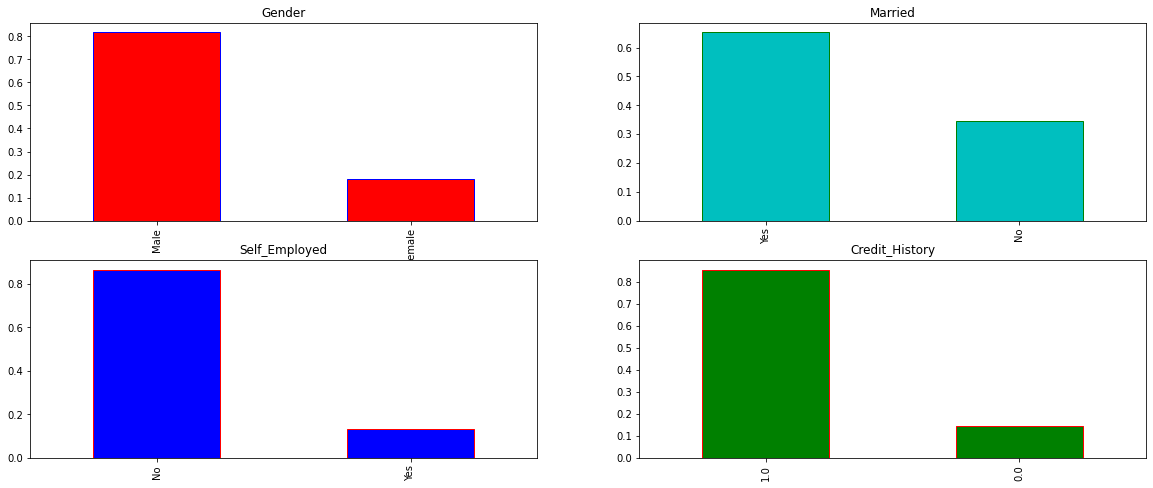

In [18]:
plt.figure(figsize=(20, 8))
plt.subplot(2,2,1)
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender',color='r',edgecolor='b')

plt.subplot(2,2,2)
df['Married'].value_counts(normalize=True).plot.bar(title='Married',color='c',edgecolor='g')

plt.subplot(2,2,3)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed',color='b',edgecolor='r')

plt.subplot(2,2,4)
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History',color='g',edgecolor='r')



From above bar plots we conclude that.
- 80% applicants in dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% of the applicants in the dataset are self-employed.
- Around 85% of the applicants have repaid their debts.

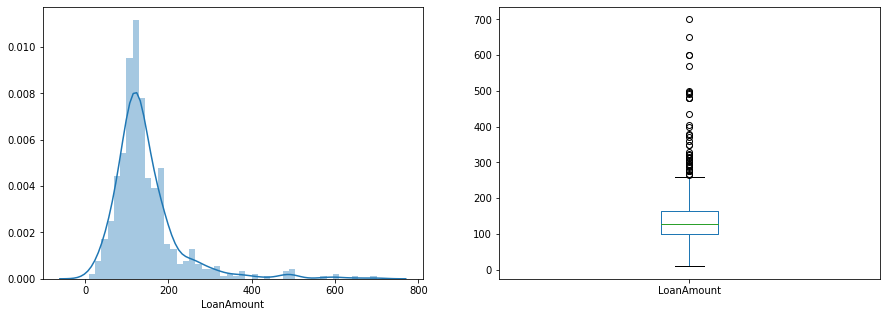

In [19]:
# Distribution of loan amount variable
import seaborn as sns
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'])

plt.subplot(1,2,2)
df['LoanAmount'].plot.box()


we see a lot of outliers in this variable and distribution is fairly normal.

Text(0, 0.5, 'Percentage')

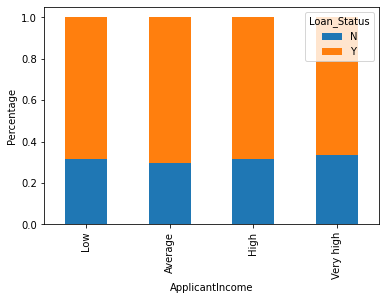

In [20]:
# lets make bins for applicant income variable based on the values in it and analyze the corresponding loan status for each bin.
import pandas as pd
bins=[0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

It can be reffered that applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assuned that if the applicant income is high the chances of loan approval will also be high.

Text(0, 0.5, 'Percentage')

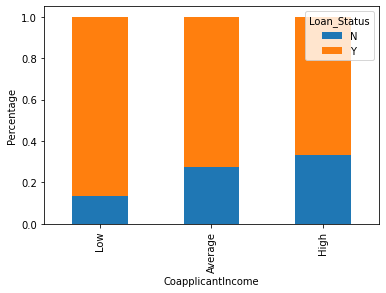

In [21]:
# now analyze the coapplicant income and loan amount variable in same manner
bins=[0,1000,3000,42000]
group = ['Low','Average','High']
df['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

It shows that if coapplicant income is less the chances of loan approval are high .But this does not look right.The possible reason behind this may be the most of the applicant dont have any coapplicant so coapplicant income for such applicant is 0 and hence loan approval is not dependent on it.so make new variable in which we will combine the applicants and coapplicants income to visualize the combined effect of loan approval.

Text(0, 0.5, 'Percentage')

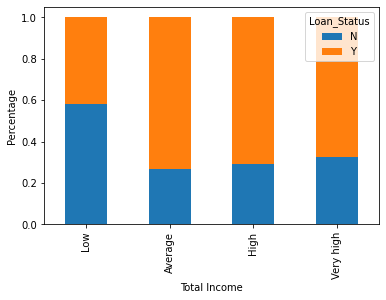

In [22]:
# combine applicant income and coapplicant income and see the combined effects of total incomeon the loan status
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
df['Total_Income_bin']=pd.cut(df['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

We can see that proportion of loans getting approved for applicants having low Total Income is very less as compared to that of applicant with Average,High ,Very high income.

In [23]:
df_cols = df[['Gender','Married', 'Dependents', 'Education','Self_Employed','Property_Area','Credit_History']]
df_cols

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,Male,No,0,Graduate,No,Urban,1.0
1,Male,Yes,1,Graduate,No,Rural,1.0
2,Male,Yes,0,Graduate,Yes,Urban,1.0
3,Male,Yes,0,Not Graduate,No,Urban,1.0
4,Male,No,0,Graduate,No,Urban,1.0
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,1.0
610,Male,Yes,3+,Graduate,No,Rural,1.0
611,Male,Yes,1,Graduate,No,Urban,1.0
612,Male,Yes,2,Graduate,No,Urban,1.0


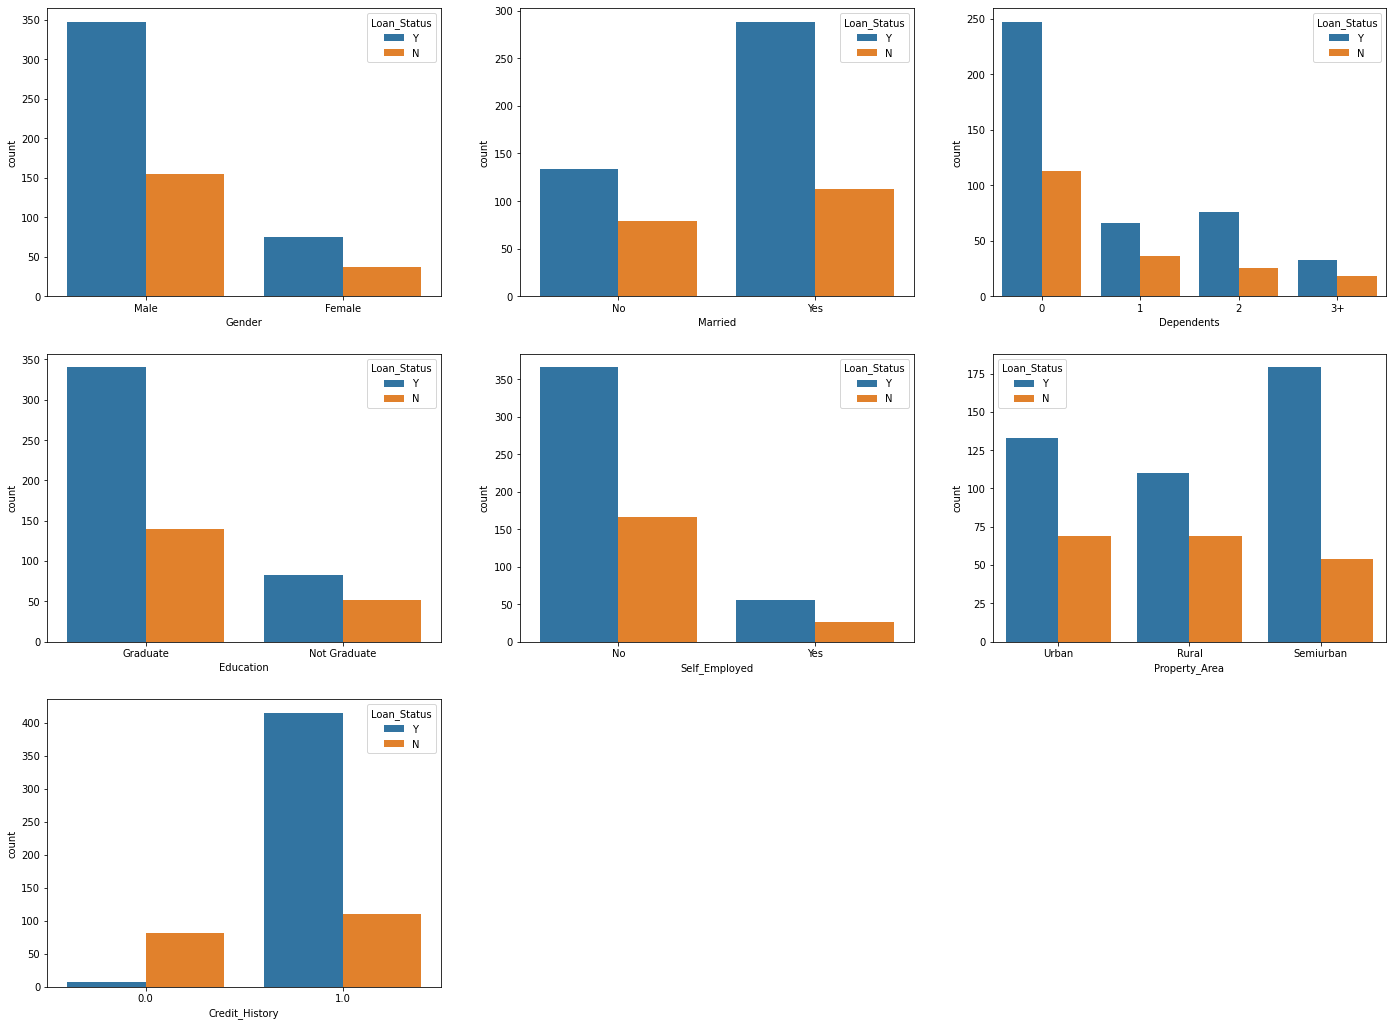

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(24, 18))

for idx, cols in enumerate(df_cols):
    
    plt.subplot(3, 3, idx+1)
    
    sns.countplot(cols, data= df, hue='Loan_Status')

In [25]:
import matplotlib.style as style
%matplotlib inline

style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

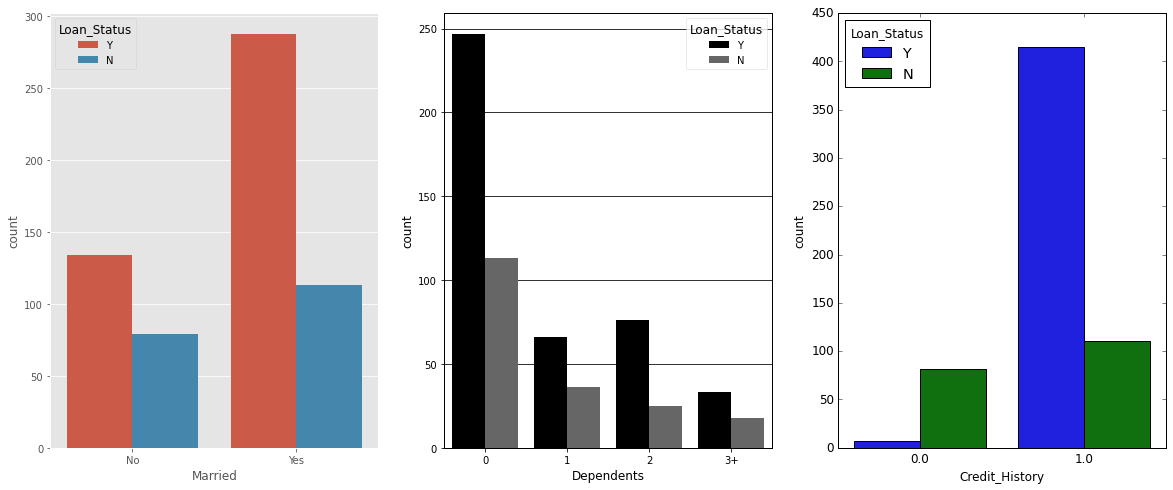

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
style.use('ggplot')
plt.subplot(1,3,1)
sns.countplot(df_cols['Married'],data= df,hue='Loan_Status')

style.use('grayscale')
plt.subplot(1,3,2)
sns.countplot(df_cols['Dependents'],data= df,hue='Loan_Status')

style.use('classic')
plt.subplot(1,3,3)
sns.countplot(df_cols['Credit_History'],data= df,hue='Loan_Status')



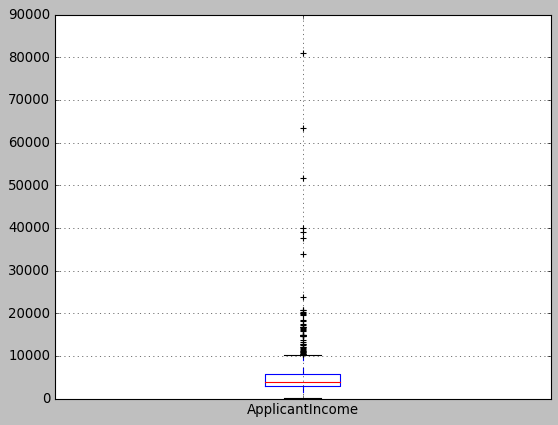

In [27]:
# boxplot of variable ApplicantIncome using training data
df.boxplot(column='ApplicantIncome')

The above boxplot confirm presence of lots of outliers and extereme values.This can be attributed to the income disparity in the society.

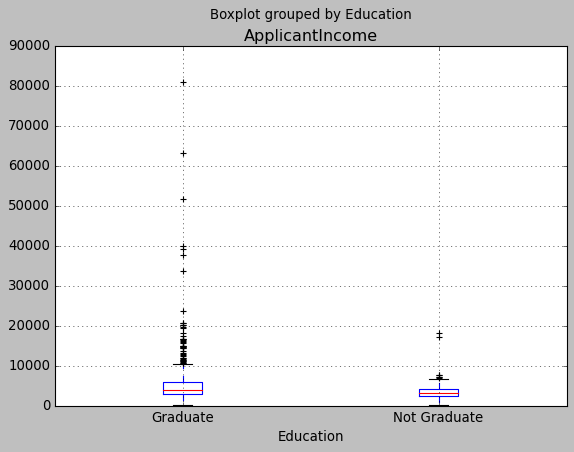

In [28]:
# boxplot of variable ApplicantIncome by variable education using training data
df.boxplot(column='ApplicantIncome',by='Education')


We can see that there is no substantial difference between mean income of graduate and not graduate.But there are higher no of graduates with very high income which are appearing to be an outliers.

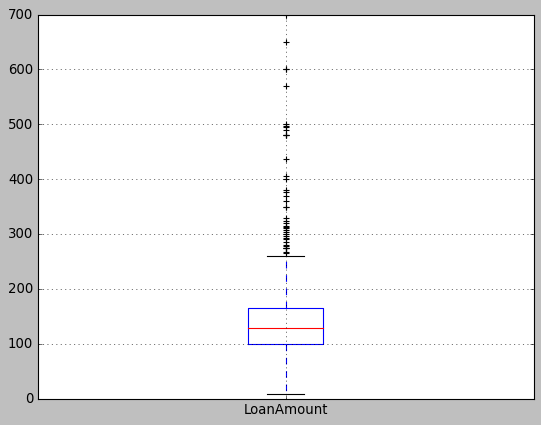

In [29]:
df.boxplot(column='LoanAmount')

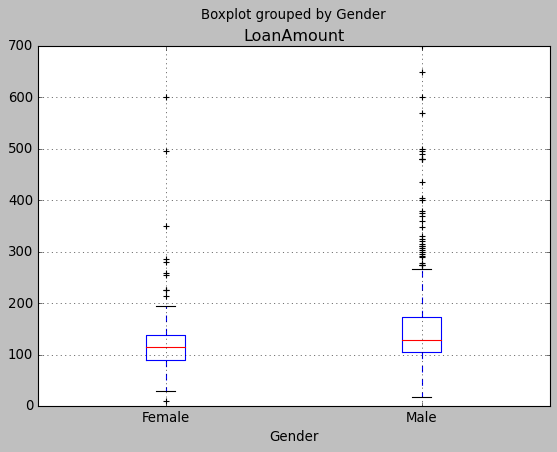

In [30]:
# boxplot of variable loanamount by variable gender using training data
df.boxplot(column='LoanAmount',by='Gender')

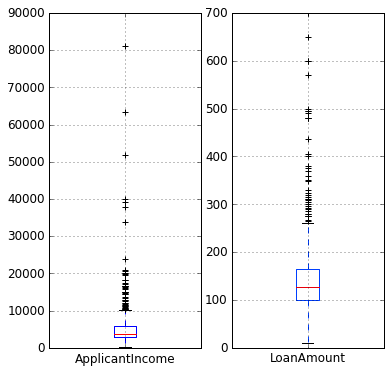

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,6))
style.use('classic')
plt.subplot(1,2,1)
df.boxplot(column='ApplicantIncome')

style.use('seaborn-bright')
plt.subplot(1,2,2)
df.boxplot(column='LoanAmount')

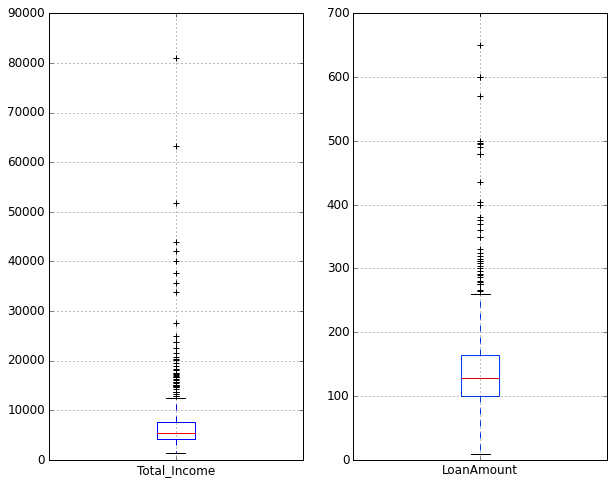

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
style.use('classic')
plt.subplot(1,2,1)
df.boxplot(column='Total_Income')

style.use('seaborn-bright')
plt.subplot(1,2,2)
df.boxplot(column='LoanAmount')

Loan amount has missing as well as extereme values while,ApplicantIncome has extreme values only.

# Outliers of Loan amount and Applicant Income

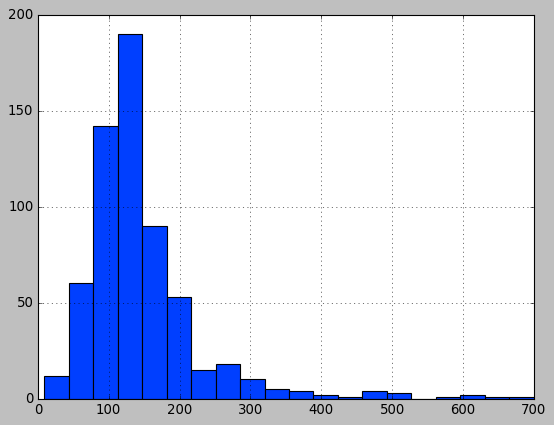

In [33]:
# looking at the distribution of loanamount
df['LoanAmount'].hist(bins=20)

the extreme values are practically possible i.e some people meight apply for high value loans due to specific need .so instead of treating them as outlier.Let's try log transformation to nullify its effect.

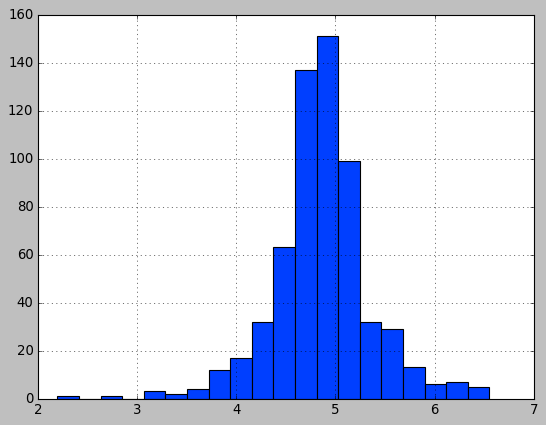

In [34]:
# apply log transformation of loan amount to make it closer to normal
df['LoanAmount_log']=np.log(df['LoanAmount'])

# looking at the distribution of loanamount log
df['LoanAmount_log'].hist(bins=20)

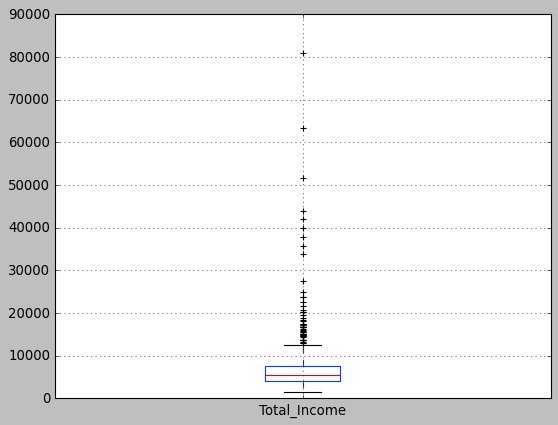

In [35]:
df.boxplot(column='Total_Income')

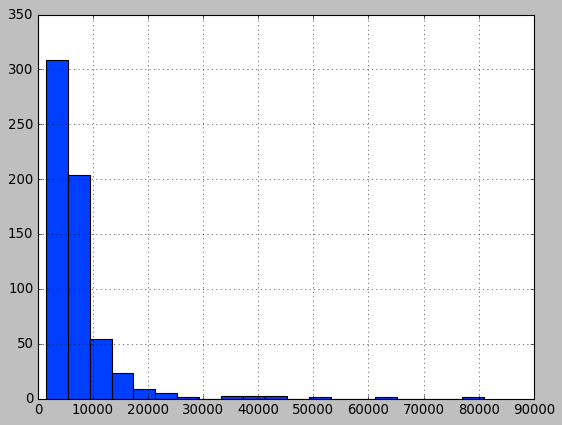

In [36]:
# looking at the distribution of Total_Income
df['Total_Income'].hist(bins=20)

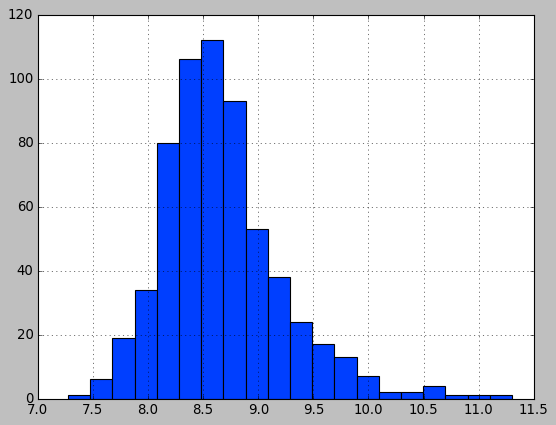

In [37]:


# apply log transformation of totalincome to make it closer to normal
df['TotalIncome_log']=np.log(df['Total_Income'])

# looking at the distribution of totalincome log
df['TotalIncome_log'].hist(bins=20)

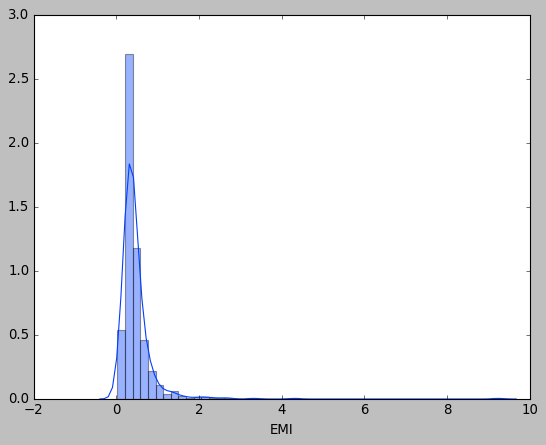

In [38]:
df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']
sns.distplot(df['EMI'])

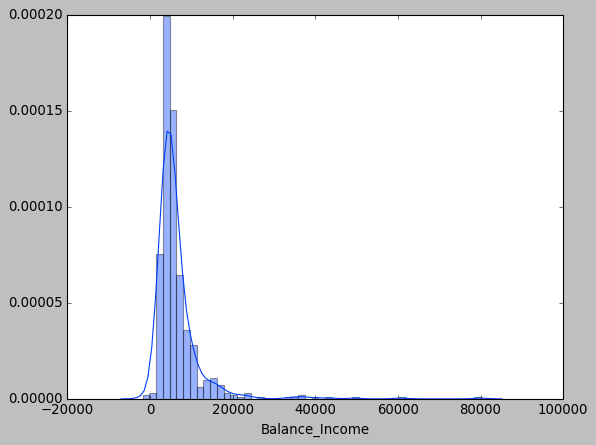

In [39]:
df['Balance_Income']=df['Total_Income']-(df['EMI']*1000)  # multiply 1000 to make units equal
sns.distplot(df['Balance_Income'])

# Correlation Matrix

Text(0.5, 1.0, 'CORRELATION MATRIX - HEATMAP')

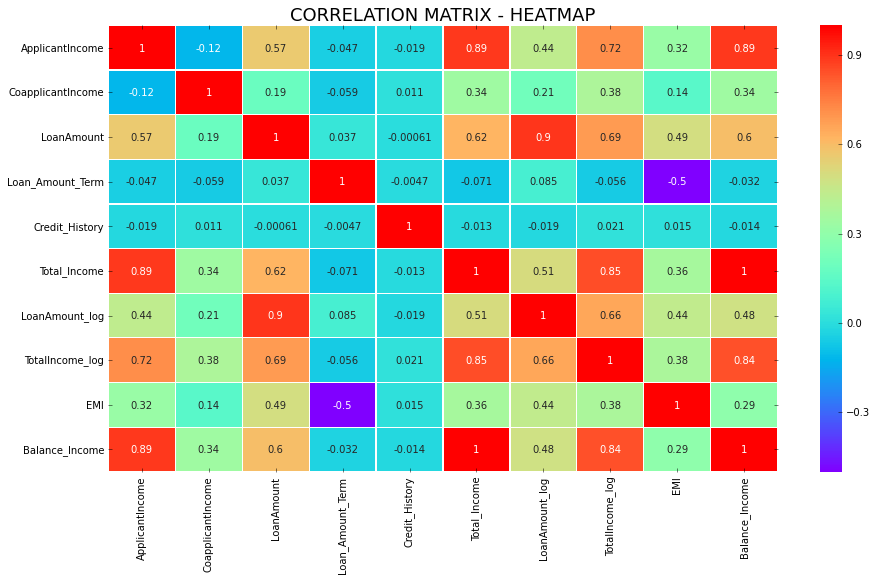

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="rainbow", annot=True,linewidth=0.1)
plt.title('CORRELATION MATRIX - HEATMAP', size=18)

# LabelEncoding:

In [41]:
from sklearn.preprocessing import LabelEncoder
l=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]

for i in l:
    le = LabelEncoder()
    le.fit(df[i])
    le.classes_
    
    df[i]=le.transform(df[i])
    
    
    
    
    
    # Gender  : Male =1 ,Female=0
    # Married : yes = 1 ,  No =0
    # Education : graduate = 0,Not graduate = 1
    # self employed : yes=1  , No=0
    # Property_Area : Urban = 2, Rular =0 ,semiurban = 1
    # Loan_status  :   Yes= 1 ,No = 0

In [42]:
df[["Dependents"]]=df_copy["Dependents"].replace(to_replace={'3+':3})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,...,2,1,High,NaN,5849.0,High,4.852030,8.674026,0.355556,5493.444444
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,...,0,0,High,Average,6091.0,Very high,4.852030,8.714568,0.355556,5735.444444
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,...,2,1,Average,NaN,3000.0,Average,4.189655,8.006368,0.183333,2816.666667
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,...,2,1,Average,Average,4941.0,High,4.787492,8.505323,0.333333,4607.666667
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,...,2,1,High,NaN,6000.0,High,4.948760,8.699515,0.391667,5608.333333


In [43]:
df=df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Coapplicant_Income_bin','Total_Income','Income_bin','Total_Income_bin'],axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,LP001002,1,0,0,0,0,1.0,2,1,4.852030,8.674026,0.355556,5493.444444
1,LP001003,1,1,1,0,0,1.0,0,0,4.852030,8.714568,0.355556,5735.444444
2,LP001005,1,1,0,0,1,1.0,2,1,4.189655,8.006368,0.183333,2816.666667
3,LP001006,1,1,0,1,0,1.0,2,1,4.787492,8.505323,0.333333,4607.666667
4,LP001008,1,0,0,0,0,1.0,2,1,4.948760,8.699515,0.391667,5608.333333


Text(0.5, 1.0, 'CORRELATION MATRIX - HEATMAP')

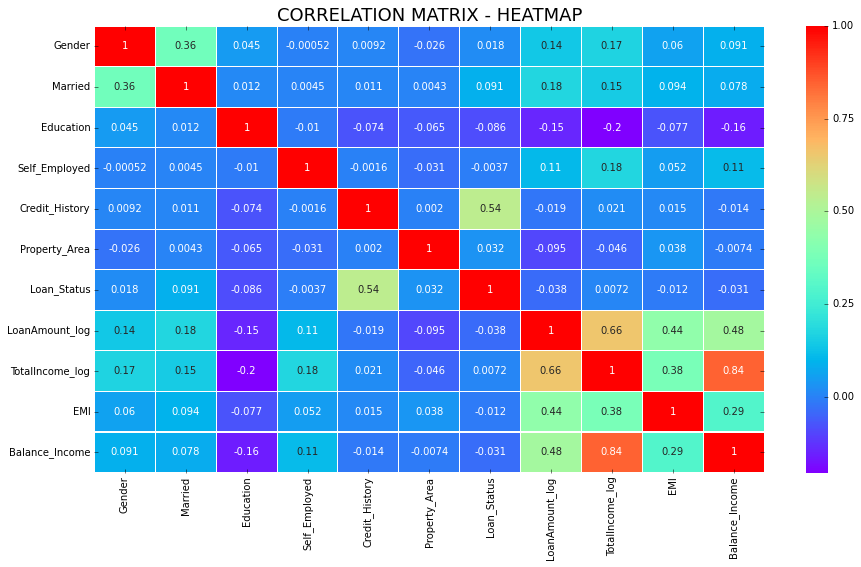

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="rainbow", annot=True,linewidth=0.1)
plt.title('CORRELATION MATRIX - HEATMAP', size=18)

# Seprate dependent and independent variable

In [45]:
# Separting the Variable into Independent and Dependent 
X = df.drop(["Loan_Status","Loan_ID"],axis=1)
y = df['Loan_Status']


In [46]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,1,0,0,0,0,1.0,2,4.852030,8.674026,0.355556,5493.444444
1,1,1,1,0,0,1.0,0,4.852030,8.714568,0.355556,5735.444444
2,1,1,0,0,1,1.0,2,4.189655,8.006368,0.183333,2816.666667
3,1,1,0,1,0,1.0,2,4.787492,8.505323,0.333333,4607.666667
4,1,0,0,0,0,1.0,2,4.948760,8.699515,0.391667,5608.333333
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,4.262680,7.972466,0.197222,2702.777778
610,1,1,3,0,0,1.0,0,3.688879,8.320205,0.222222,3883.777778
611,1,1,1,0,0,1.0,2,5.533389,9.025456,0.702778,7609.222222
612,1,1,2,0,0,1.0,2,5.231109,8.933664,0.519444,7063.555556


In [47]:
print(X.shape)
print(y.shape)

(614, 11)
(614,)


# Train test split:

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y,train_size=0.80, test_size = 0.20, random_state =0)

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(491, 11)
(491,)
(123, 11)
(123,)


In [50]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
90,1,1,0,0,0,1.0,1,4.875197,8.675564,0.363889,5494.111111
533,1,0,1,0,0,1.0,1,5.278115,9.328123,0.544444,10705.555556
452,1,1,0,0,0,0.0,0,5.003946,8.644883,0.413889,5267.111111
355,0,0,0,0,0,1.0,2,4.753590,8.246172,0.644444,3168.555556
266,1,1,2,0,0,1.0,1,5.010635,8.715224,0.416667,5678.333333
...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,1.0,2,4.382027,8.390041,0.222222,4180.777778
9,1,1,1,0,0,1.0,1,5.855072,10.077819,0.969444,22839.555556
359,1,1,3,0,0,1.0,1,5.298317,9.028099,0.555556,7778.444444
192,1,1,0,1,0,1.0,2,5.075174,8.705000,0.444444,5588.555556


In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
X_train

array([[ 0.47374983,  0.71143163, -0.76304669, ...,  0.00958339,
        -0.25885012, -0.17614415],
       [ 0.47374983, -1.40561644,  0.22549137, ...,  1.16625572,
         0.20520758,  0.59774724],
       [ 0.47374983,  0.71143163, -0.76304669, ..., -0.04479911,
        -0.13034183, -0.2098533 ],
       ...,
       [ 0.47374983,  0.71143163,  2.2025675 , ...,  0.63445755,
         0.23376498,  0.1630758 ],
       [ 0.47374983,  0.71143163, -0.76304669, ...,  0.06175942,
        -0.05180899, -0.1621193 ],
       [-2.11081869,  0.71143163, -0.76304669, ...,  0.19009237,
         0.10525669, -0.10392441]])

# Imabalanced Technique

In [53]:
print("before oversampling count of label '0' : {}".format(sum(y_train == 0)))
print("before oversampling count of label '1' : {}".format(sum(y_train == 1)))

before oversampling count of label '0' : 159
before oversampling count of label '1' : 332


In [54]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [55]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# create Decision tree classifier object
clf= DecisionTreeClassifier(criterion="entropy",max_depth= 3) 

# Train Decision tree classifier
clf=clf.fit(X_train,y_train)

#Predict the response for test data
y_pred= clf.predict(X_test)
print(y_pred)
print(y_pred.shape)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
(123,)


In [56]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Decision tree classifier for test data is :",accuracy)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

Accuracy of Decision tree classifier for test data is : 0.8211382113821138
[[14 19]
 [ 3 87]]


# Oversampling - SMOTE

In [57]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_s,y_train_s = smt.fit_sample(X_train,y_train)

In [58]:
print("after oversampling count of label '0' : {}".format(sum(y_train_s == 0)))
print("after oversampling count of label '1' : {}".format(sum(y_train_s == 1)))

after oversampling count of label '0' : 332
after oversampling count of label '1' : 332


In [59]:
# create Decision tree classifier object
clf_s= DecisionTreeClassifier(criterion="entropy",max_depth= 3) 

# Train Decision tree classifier
clf_s=clf_s.fit(X_train_s,y_train_s)

#Predict the response for test data
y_pred_s= clf_s.predict(X_test)
print(y_pred_s)
print(y_pred_s.shape)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
(123,)


In [60]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_s)
print("Accuracy of Decision tree classifier for test data is :",accuracy)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_s)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_s))

Accuracy of Decision tree classifier for test data is : 0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



# NearMiss - Undersampling

In [61]:
from imblearn.under_sampling import NearMiss
nr= NearMiss()

X_train_miss,y_train_miss = nr.fit_sample(X_train,y_train.ravel())

In [62]:
print("after undersampling count of label '0' : {}".format(sum(y_train_miss == 0)))
print("after undersampling count of label '1' : {}".format(sum(y_train_miss == 1)))

after undersampling count of label '0' : 159
after undersampling count of label '1' : 159


In [63]:
# create Decision tree classifier object
clf_n= DecisionTreeClassifier(criterion="entropy",max_depth= 3) 

# Train Decision tree classifier
clf_n=clf_n.fit(X_train_miss,y_train_miss)

#Predict the response for test data
y_pred_n= clf_n.predict(X_test)
print(y_pred_n)
print(y_pred_n.shape)

[0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 1 0 0 1 1 0 1 0 0 1]
(123,)


In [64]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_n)
print("Accuracy of Decision tree classifier for test data is :",accuracy)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_n)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_n))

Accuracy of Decision tree classifier for test data is : 0.7317073170731707
[[20 13]
 [20 70]]
              precision    recall  f1-score   support

           0       0.50      0.61      0.55        33
           1       0.84      0.78      0.81        90

    accuracy                           0.73       123
   macro avg       0.67      0.69      0.68       123
weighted avg       0.75      0.73      0.74       123



# Decision Tree Classifier

In [65]:
 # Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [66]:
# create Decision tree classifier object
clf= DecisionTreeClassifier(criterion="entropy",max_depth= 3) 

# Train Decision tree classifier
clf=clf.fit(X_train,y_train)

#Predict the response for test data
y_pred= clf.predict(X_test)
print(y_pred)
print(y_pred.shape)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
(123,)


In [67]:
# for train data
#Predict the response for train data
y_pred_t= clf.predict(X_train)
print(y_pred_t)
print(y_pred_t.shape)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1]
(49

# Accuracy

In [68]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Decision tree classifier for test data is :",accuracy)

Accuracy of Decision tree classifier for test data is : 0.8211382113821138


In [69]:
accuracy_train=accuracy_score(y_train,y_pred_t)
print("Accuracy of Decision tree classifier for train data is :",accuracy_train)

Accuracy of Decision tree classifier for train data is : 0.8187372708757638


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



In [71]:
#print(classification_report(y_test,y_pred,target_names='Loan_status'))

In [72]:
#print(classification_report(actual,prediction,target_names=Loan_status))

# Confusion Matrix

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

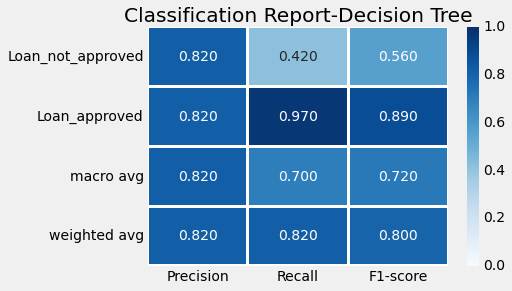

In [74]:
# classification report plot
clr=pd.DataFrame()
clr['Precision']=[0.82,0.82,0.82,0.82]
clr['Recall']=[0.42,0.97,0.70,0.82]
clr['F1-score']=[0.56,0.89,0.72,0.80]
clr.index=['Loan_not_approved','Loan_approved','macro avg','weighted avg']
#plt.figure(figsize=(10,10))
sns.heatmap(clr,annot=True,fmt='.3f',vmin=0,vmax=1,linewidths=2,cmap='Blues')
plt.title('Classification Report-Decision Tree')

plt.show()

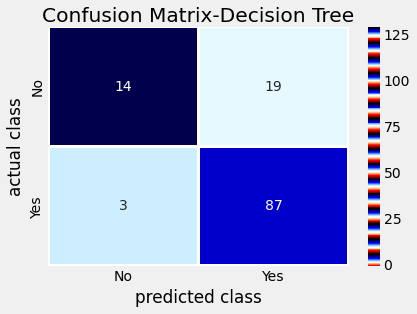

In [75]:
cm =confusion_matrix(y_test,y_pred)
cm=pd.DataFrame(cm)
cm.index=cm.columns=['No','Yes']
sns.heatmap(cm,annot=True,fmt='.0f',vmin=0,vmax=130,linewidths=2,cmap='flag')
plt.title('Confusion Matrix-Decision Tree')
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[14, 19],
       [ 3, 87]], dtype=int64)

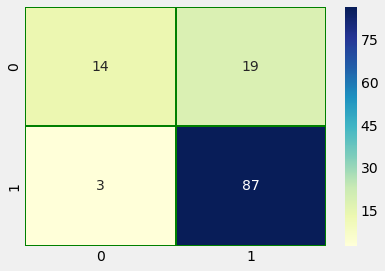

In [77]:
sns.heatmap(cm,annot=True,cmap="YlGnBu",linewidths=1,linecolor='g')

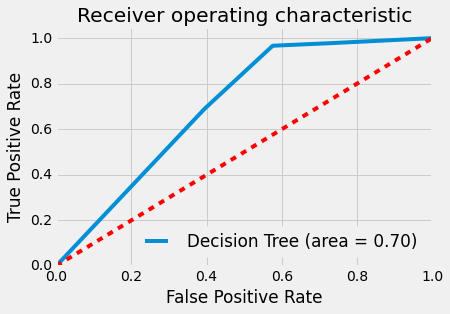

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_DT')
plt.show()

In [79]:
from sklearn import tree
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [80]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_5 <= -0.99
|   |--- feature_7 <= 0.00
|   |   |--- class: 0
|   |--- feature_7 >  0.00
|   |   |--- feature_9 <= 4.86
|   |   |   |--- class: 0
|   |   |--- feature_9 >  4.86
|   |   |   |--- class: 1
|--- feature_5 >  -0.99
|   |--- feature_10 <= -0.73
|   |   |--- class: 0
|   |--- feature_10 >  -0.73
|   |   |--- feature_7 <= 0.41
|   |   |   |--- class: 1
|   |   |--- feature_7 >  0.41
|   |   |   |--- class: 1



In [81]:
#If you want to save it to the file, it can be done with following code:
with open("decistion_tree.log", "w") as fout:    
    fout.write(text_representation)

In [82]:
feature_cols=[ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'LoanAmount_log', 'TotalIncome_log', 'EMI', 'Balance_Income' ]
feature_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'TotalIncome_log',
 'EMI',
 'Balance_Income']

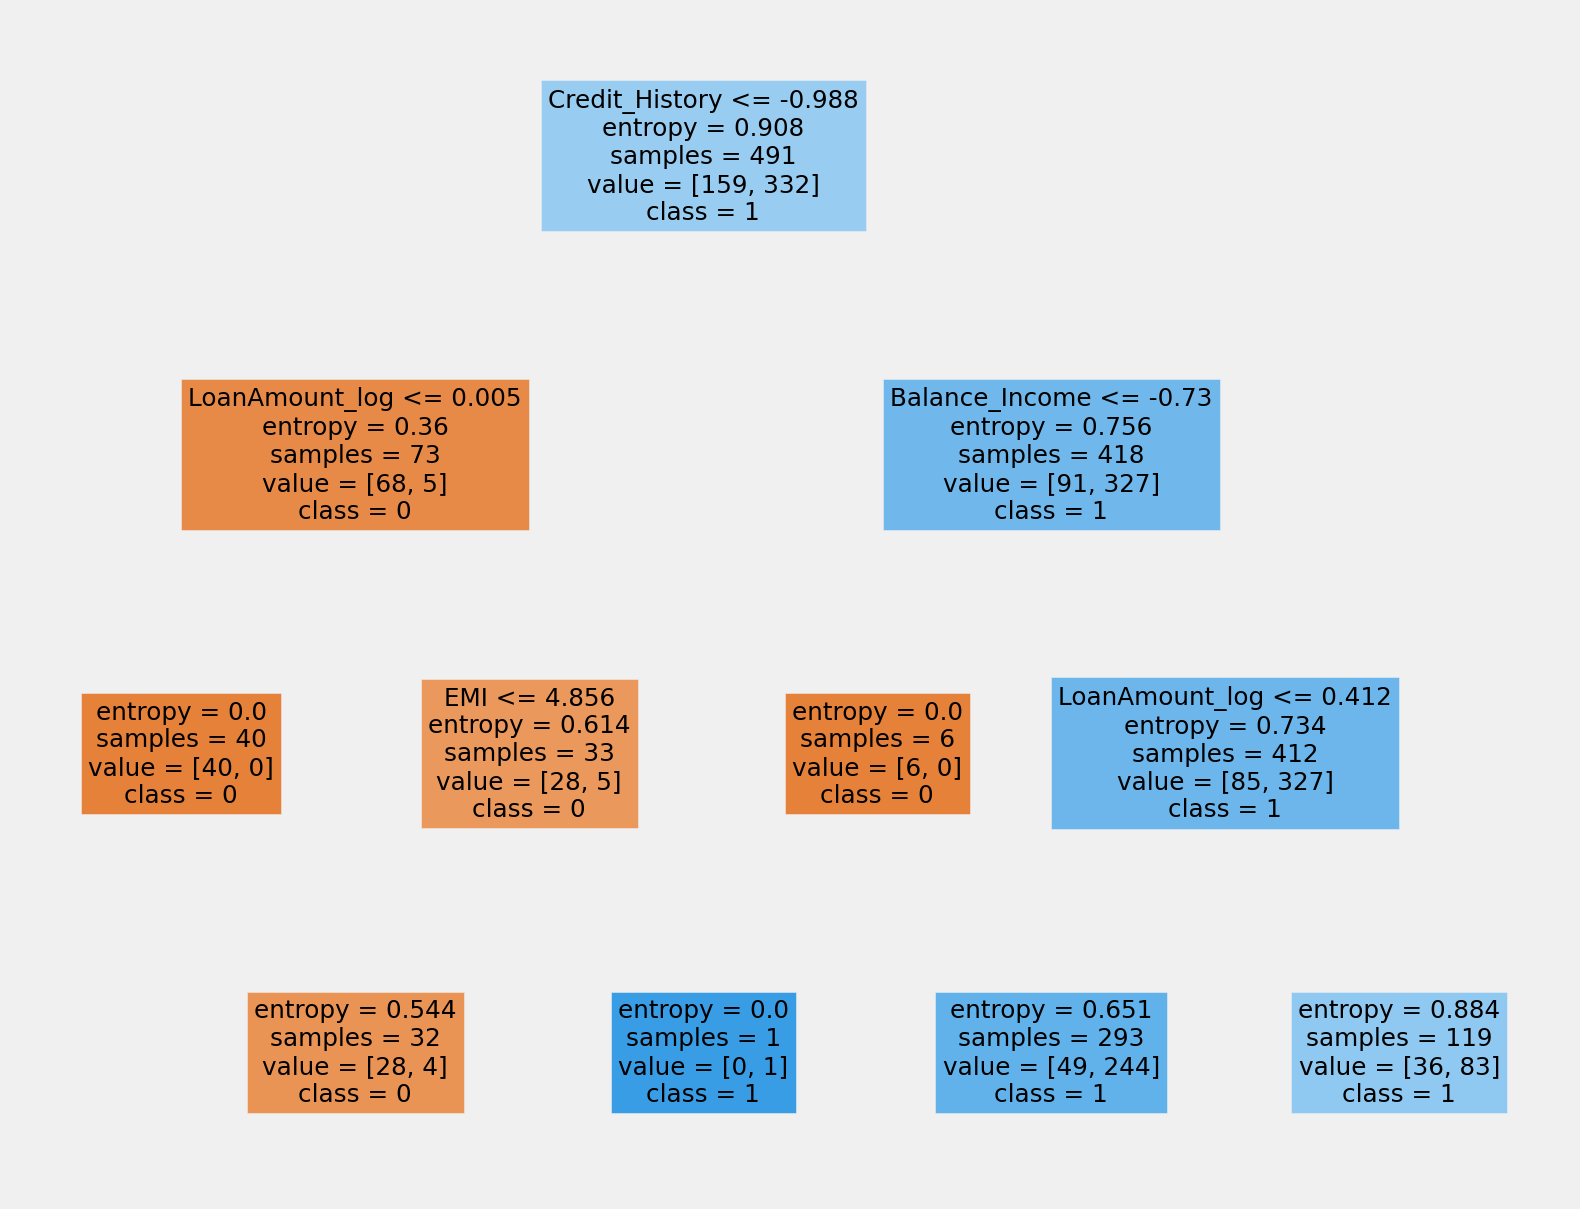

In [83]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

In [84]:
#import graphviz
# DOT data
#dot_data = tree.export_graphviz(clf, out_file=None, 
 #                               feature_names=feature_cols,  
 #                               class_names=['0','1'],
  #                              filled=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
#graph

In [85]:
#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#import pydotplus

#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('LoanDT.png')
#Image(graph.create_png())

# Cross Validation

# K-Fold cv

In [86]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X,y,cv=10)
score

array([0.79032258, 0.80645161, 0.70967742, 0.77419355, 0.78688525,
       0.78688525, 0.83606557, 0.83606557, 0.78688525, 0.83606557])

In [87]:
score.mean()

0.7949497620306716

# Stratified K-Fold cross validation

In [88]:
from sklearn.model_selection import StratifiedKFold

accuracy= []

skf = StratifiedKFold(n_splits=5, random_state=None)
skf.get_n_splits(X,y)
#X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    print('Train:',train_index,'validation:',test_index)
    X1_train,X1_test = X.iloc[train_index], X.iloc[test_index] 
    y1_train,y1_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X1_train,y1_train)
    predictions = clf.predict(X1_test)
    score=accuracy_score(predictions,y1_test)
    accuracy.append(score)

print(accuracy)
    

Train: [112 118 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367

In [89]:
np.array(accuracy).mean()

0.8029721444755433

In [90]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome_log', 'EMI', 'Balance_Income'],
      dtype='object')

In [91]:
target=['Loan_Status']
target

['Loan_Status']

In [92]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus


#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
    #            filled=True, rounded=True,
     #           special_characters=True, feature_names =feature_cols )
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('LoanDT.png')
#Image(graph.create_png())

# Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
# create random forest classifier
rf_model= RandomForestClassifier(n_estimators = 100,random_state=0)

#training the classifier
rf_model.fit(X_train,y_train)

#Applying trained classifier to test
y_pred = rf_model.predict(X_test)


In [94]:
# for train data
#Predict the response for train data
y_pred_t= rf_model.predict(X_train)

# Confusion Matrix & Accuracy

In [95]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm=confusion_matrix(y_pred,y_test)
print(cm)
print(classification_report(y_pred,y_test))

[[15 10]
 [18 80]]
              precision    recall  f1-score   support

           0       0.45      0.60      0.52        25
           1       0.89      0.82      0.85        98

    accuracy                           0.77       123
   macro avg       0.67      0.71      0.68       123
weighted avg       0.80      0.77      0.78       123



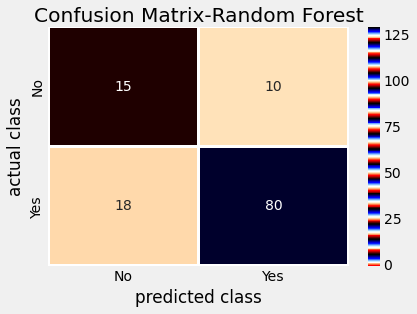

In [96]:
cm =confusion_matrix(y_pred,y_test)
cm=pd.DataFrame(cm)
cm.index=cm.columns=['No','Yes']
sns.heatmap(cm,annot=True,fmt='.0f',vmin=0,vmax=130,linewidths=2,cmap='flag')
plt.title('Confusion Matrix-Random Forest')
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

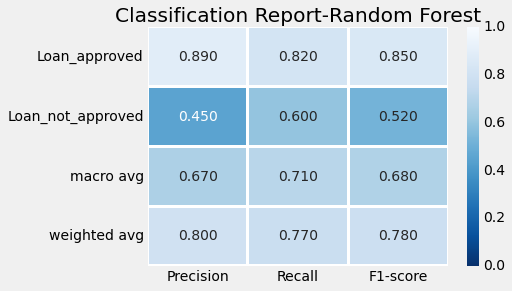

In [97]:
# classification report plot
clr=pd.DataFrame()
clr['Precision']=[0.89,0.45,0.67,0.80]
clr['Recall']=[0.82,0.60,0.71,0.77]
clr['F1-score']=[0.85,0.52,0.68,0.78]
clr.index=['Loan_approved','Loan_not_approved','macro avg','weighted avg']
#plt.figure(figsize=(10,10))
sns.heatmap(clr,annot=True,fmt='.3f',vmin=0,vmax=1,linewidths=2,cmap='Blues_r')
plt.title('Classification Report-Random Forest')

plt.show()

In [98]:
accuracy= accuracy_score(y_pred,y_test)
print("Accuracy of Random Forest Classifier for test data  is :",accuracy)

Accuracy of Random Forest Classifier for test data  is : 0.7723577235772358


In [99]:
accuracy_train=accuracy_score(y_train,y_pred_t)
print("Accuracy of Random Forest classifier for train data is :",accuracy_train)

Accuracy of Random Forest classifier for train data is : 1.0


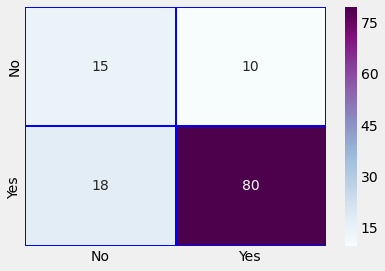

In [100]:
sns.heatmap(cm,annot=True,cmap="BuPu",linewidths=1,linecolor='b',fmt="d",xticklabels=True, yticklabels=True)

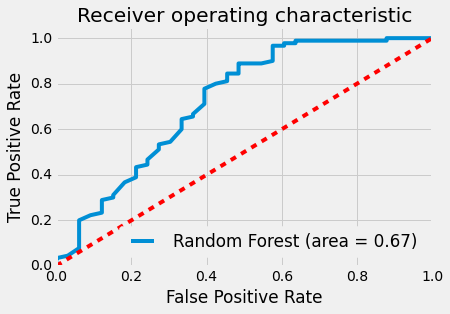

In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_RF')
plt.show()

        cmap color =      Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

# Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf_model,X,y,cv=10)
print(score)
print(score.mean())

[0.74193548 0.82258065 0.70967742 0.80645161 0.73770492 0.80327869
 0.86885246 0.85245902 0.80327869 0.81967213]
0.7965891062929666


# Stratified K-Fold cross validation

In [103]:
from sklearn.model_selection import StratifiedKFold

accuracy= []

skf = StratifiedKFold(n_splits=5, random_state=None)
skf.get_n_splits(X,y)
#X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    print('Train:',train_index,'validation:',test_index)
    X1_train,X1_test = X.iloc[train_index], X.iloc[test_index] 
    y1_train,y1_test = y.iloc[train_index], y.iloc[test_index]
    rf_model.fit(X1_train,y1_train)
    predictions = rf_model.predict(X1_test)
    score=accuracy_score(predictions,y1_test)
    accuracy.append(score)

print(accuracy)
print(np.array(accuracy).mean())   

Train: [112 118 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367

Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

# KNN

In [104]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for i in range(0,9):
    i = i+1
    knn = KNeighborsClassifier(n_neighbors=i)
    #Train the model using the training sets
    knn.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred=knn.predict(X_test)
    #Predict the response for train dataset
    y_pred_t=knn.predict(X_train)
   
    #accuracy calculation
    acc=metrics.accuracy_score(y_test,y_pred)
    acc_t = metrics.accuracy_score(y_train,y_pred_t)
    print("Accuracy of Knn for test data for k=",i,'is:',acc)
    print("Accuracy of Knn for train data for k=",i,'is:',acc_t)

Accuracy of Knn for test data for k= 1 is: 0.7235772357723578
Accuracy of Knn for train data for k= 1 is: 1.0
Accuracy of Knn for test data for k= 2 is: 0.6504065040650406
Accuracy of Knn for train data for k= 2 is: 0.869653767820774
Accuracy of Knn for test data for k= 3 is: 0.7967479674796748
Accuracy of Knn for train data for k= 3 is: 0.8472505091649695
Accuracy of Knn for test data for k= 4 is: 0.7642276422764228
Accuracy of Knn for train data for k= 4 is: 0.8309572301425662
Accuracy of Knn for test data for k= 5 is: 0.8130081300813008
Accuracy of Knn for train data for k= 5 is: 0.8044806517311609
Accuracy of Knn for test data for k= 6 is: 0.7967479674796748
Accuracy of Knn for train data for k= 6 is: 0.814663951120163
Accuracy of Knn for test data for k= 7 is: 0.8130081300813008
Accuracy of Knn for train data for k= 7 is: 0.8044806517311609
Accuracy of Knn for test data for k= 8 is: 0.7967479674796748
Accuracy of Knn for train data for k= 8 is: 0.8085539714867617
Accuracy of Knn f

In [105]:
# NOW WITH K=10
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(metrics.confusion_matrix(y_test,pred))

print(metrics.classification_report(y_test,pred))

[[14 19]
 [ 4 86]]
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        33
           1       0.82      0.96      0.88        90

    accuracy                           0.81       123
   macro avg       0.80      0.69      0.72       123
weighted avg       0.81      0.81      0.79       123



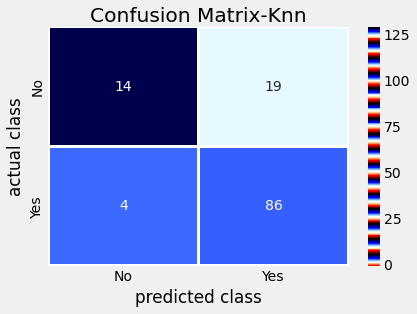

In [106]:
cm =confusion_matrix(y_test,pred)
cm=pd.DataFrame(cm)
cm.index=cm.columns=['No','Yes']
sns.heatmap(cm,annot=True,fmt='.0f',vmin=0,vmax=130,linewidths=2,cmap='flag')
plt.title('Confusion Matrix-Knn')
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

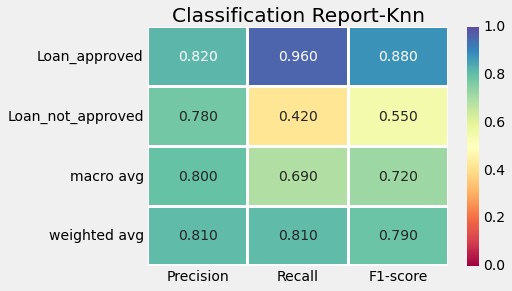

In [107]:
# classification report plot
clr=pd.DataFrame()
clr['Precision']=[0.82,0.78,0.80,0.81]
clr['Recall']=[0.96,0.42,0.69,0.81]
clr['F1-score']=[0.88,0.55,0.72,0.79]
clr.index=['Loan_approved','Loan_not_approved','macro avg','weighted avg']
#plt.figure(figsize=(10,10))
sns.heatmap(clr,annot=True,fmt='.3f',vmin=0,vmax=1,linewidths=2,cmap='Spectral')
plt.title('Classification Report-Knn')

plt.show()

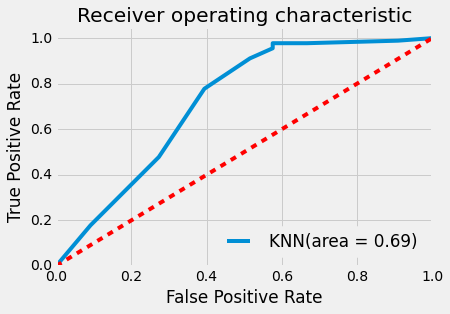

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_knn')
plt.show()

# Naive bayes algorithm

In [109]:
from sklearn.naive_bayes import GaussianNB 
# fit model
nb_model= GaussianNB()

#Train model using training set
nb_model.fit(X_train,y_train)

# Predict response fot test set
y_pred= nb_model.predict(X_test)



In [110]:
# Predict response fot test set
y_pred_t=nb_model.predict(X_train)

# Accuracy

In [111]:
#Model Accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy of Naive Bayes Classifier for test data is :",metrics.accuracy_score(y_test,y_pred))

Accuracy of Naive Bayes Classifier for test data is : 0.8292682926829268


In [112]:
accuracy_train=accuracy_score(y_train,y_pred_t)
print("Accuracy of Naive Bayes classifier for train data is :",metrics.accuracy_score(y_train,y_pred_t))

Accuracy of Naive Bayes classifier for train data is : 0.8044806517311609


# Confusion Matrix:

In [113]:
# implementing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[15 18]
 [ 3 87]]


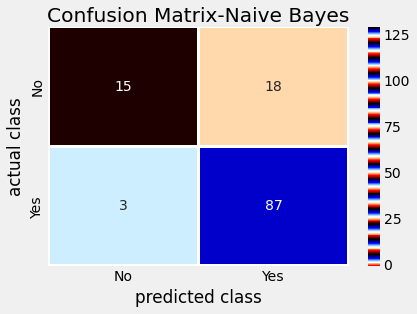

In [114]:
cm =confusion_matrix(y_test,y_pred)
cm=pd.DataFrame(cm)
cm.index=cm.columns=['No','Yes']
sns.heatmap(cm,annot=True,fmt='.0f',vmin=0,vmax=130,linewidths=2,cmap='flag')
plt.title('Confusion Matrix-Naive Bayes')
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

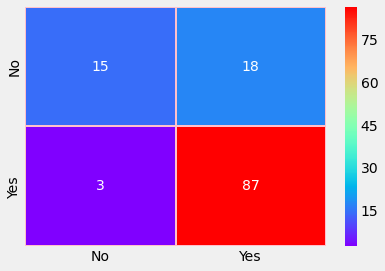

In [115]:
sns.heatmap(cm,annot=True,cmap="rainbow",linewidths=1,linecolor='pink',fmt="d")

In [116]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



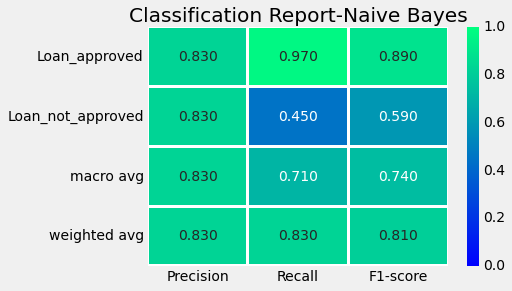

In [117]:
# classification report plot
clr=pd.DataFrame()
clr['Precision']=[0.83,0.83,0.83,0.83]
clr['Recall']=[0.97,0.45,0.71,0.83]
clr['F1-score']=[0.89,0.59,0.74,0.81]
clr.index=['Loan_approved','Loan_not_approved','macro avg','weighted avg']
#plt.figure(figsize=(10,10))
sns.heatmap(clr,annot=True,fmt='.3f',vmin=0,vmax=1,linewidths=2,cmap='winter')
plt.title('Classification Report-Naive Bayes')

plt.show()

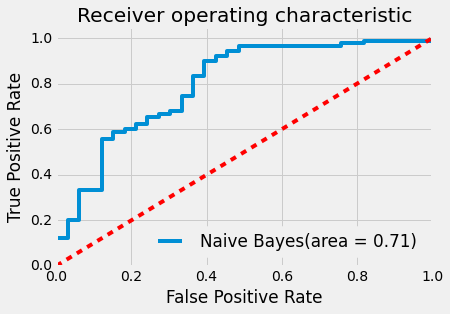

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, nb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_NB')
plt.show()

# Logistic Regression


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC


In [120]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)


print("Accuracy of Logistic Regression for test data is :",metrics.accuracy_score(y_test, predictions))

Accuracy of Logistic Regression for test data is : 0.8292682926829268


In [121]:
predictions_train = model.predict(X_train)


print("Accuracy of Logistic Regression for train data is :",metrics.accuracy_score(y_train, predictions_train))

Accuracy of Logistic Regression for train data is : 0.8044806517311609


so our prediction are almost 83% accurate i.e we have identified 83% of loan status correct.

# Confusion Matrix:

In [122]:
# implementing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
print(cm)


[[14 19]
 [ 2 88]]


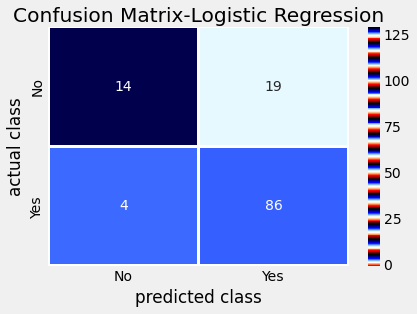

In [123]:
cm =confusion_matrix(y_test,pred)
cm=pd.DataFrame(cm)
cm.index=cm.columns=['No','Yes']
sns.heatmap(cm,annot=True,fmt='.0f',vmin=0,vmax=130,linewidths=2,cmap='flag')
plt.title('Confusion Matrix-Logistic Regression')
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

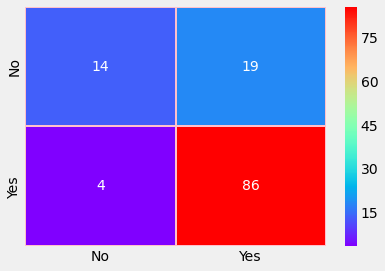

In [124]:
sns.heatmap(cm,annot=True,cmap="rainbow",linewidths=1,linecolor='pink',fmt="d")

In [125]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



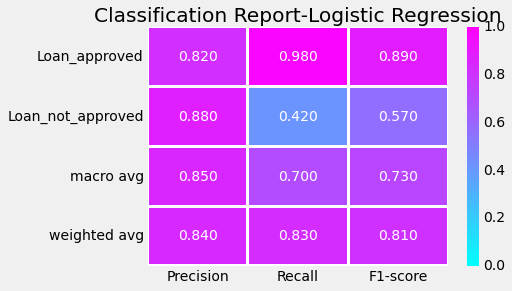

In [126]:
# classification report plot
clr=pd.DataFrame()
clr['Precision']=[0.82,0.88,0.85,0.84]
clr['Recall']=[0.98,0.42,0.70,0.83]
clr['F1-score']=[0.89,0.57,0.73,0.81]
clr.index=['Loan_approved','Loan_not_approved','macro avg','weighted avg']
#plt.figure(figsize=(10,10))
sns.heatmap(clr,annot=True,fmt='.3f',vmin=0,vmax=1,linewidths=2,cmap='cool')
plt.title('Classification Report-Logistic Regression')

plt.show()

# ROC curve

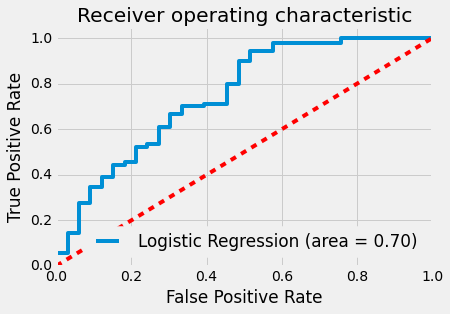

In [127]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# SVM

In [128]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  


SVC(kernel='linear', random_state=0)

In [129]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [130]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[14, 19],
       [ 2, 88]], dtype=int64)

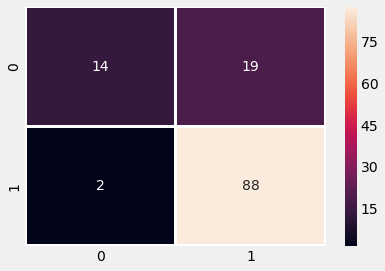

In [131]:
sns.heatmap(cm,annot=True,linewidths=2,linecolor='white',fmt="d")

In [132]:
accuracy = float(cm.diagonal().sum())/len(y_test)
acc_t=float(cm.diagonal().sum())/len(y_train)
print("\nAccuracy Of SVM For The test Dataset : ", accuracy)
print("\nAccuracy Of SVM For The train Dataset : ", acc_t)


Accuracy Of SVM For The test Dataset :  0.8292682926829268

Accuracy Of SVM For The train Dataset :  0.20773930753564154


# Feature Importance

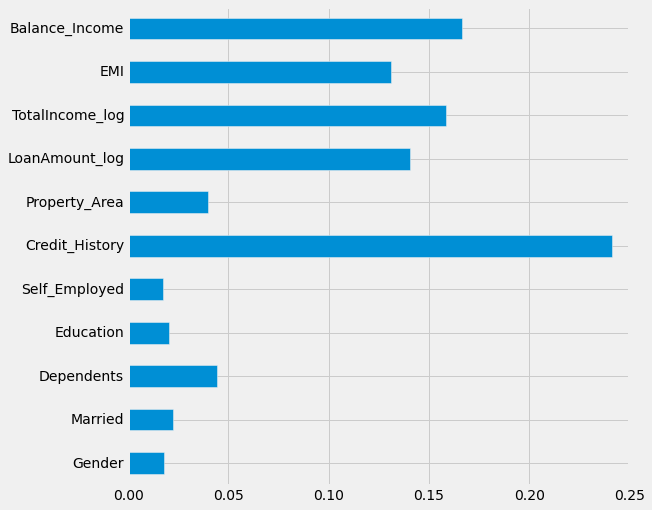

In [133]:
# for random forest model
importance=pd.Series(rf_model.feature_importances_,index=X.columns)
importance.plot(kind='barh',figsize=(8,8))

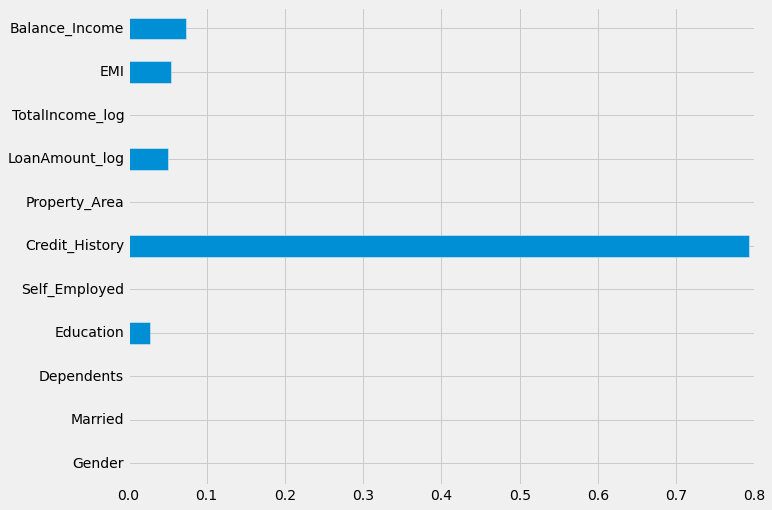

In [134]:
# for decision tree classifier
importance=pd.Series(clf.feature_importances_,index=X.columns)
importance.plot(kind='barh',figsize=(10,8))

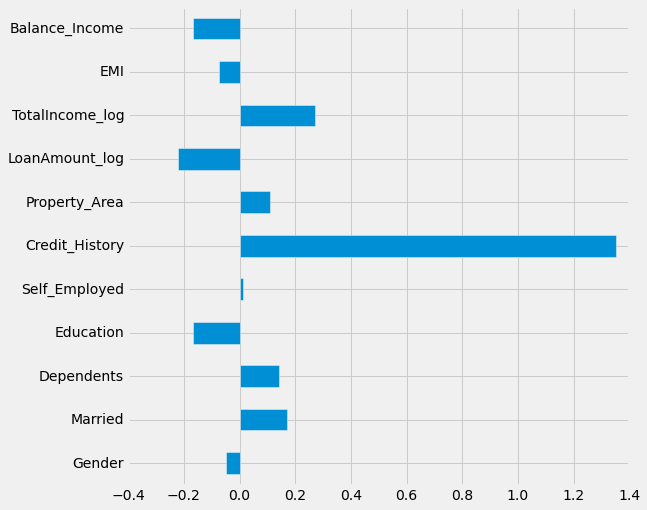

In [135]:
# for logistic regression
importance=pd.Series(model.coef_[0],index=X.columns)
importance.plot(kind='barh',figsize=(8,8))